In [1]:
import numpy as np
import pandas as pd
import pickle
from os import path
from CSVUtils import *
import matplotlib.pyplot as plt

In [2]:
def plot_benchmark(start_date, end_date, title):
    import numpy as np
    import pandas as pd
    import pickle
    from os import path
    from CSVUtils import csv2df
    import matplotlib.pyplot as plt
    
    DIR ="./from github/Stock-Trading-Environment/data"
    file_list = ["^BVSP", "^TWII", "^IXIC"]
    
    df_list = []

    for file_name in file_list:
        df = csv2df(DIR, file_name+"_new.csv", source="done")
        df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].reset_index(drop = True)
        df_list.append(df)
    
    init_price = np.array([df['Price'][0] for df in df_list])
    init_num = 100000/init_price
    bnh_value = []
    for i in range(len(df_list[0])):
        date = df_list[0]['Date'][i]
        if ((df_list[1]['Date'] == date).any()) and ((df_list[2]['Date'] == date).any()):
            price_arr = np.array([df[df['Date']==date]['Price'].values[0] for df in df_list])
            market_value = init_num*price_arr
            avg_value = np.mean(market_value)
            bnh_value.append({
                "Date": date,
                "Value": avg_value
            })
    
    plt.figure(figsize = (20, 10))

    for i, df in enumerate(df_list):
        y = np.log(df['Price']/df['Price'][0])
        moving_avg = pd.Series(y).rolling(window=10).mean().values   
        plt.plot(df['Date'], moving_avg, label = file_list[i])


    bnh_df = pd.DataFrame(bnh_value)
    y = np.log(bnh_df['Value']/100000)
    moving_avg = pd.Series(y).rolling(window=10).mean().values

    plt.plot(bnh_df['Date'], moving_avg, linewidth=3, label = "Buy and Hold Portfolio")    
    plt.axhline(y=0, color = "grey", linestyle='--')
    plt.xlabel("Date")
    plt.ylabel("Log Market Value")
    plt.title(title)
    plt.legend()
    plt.show()

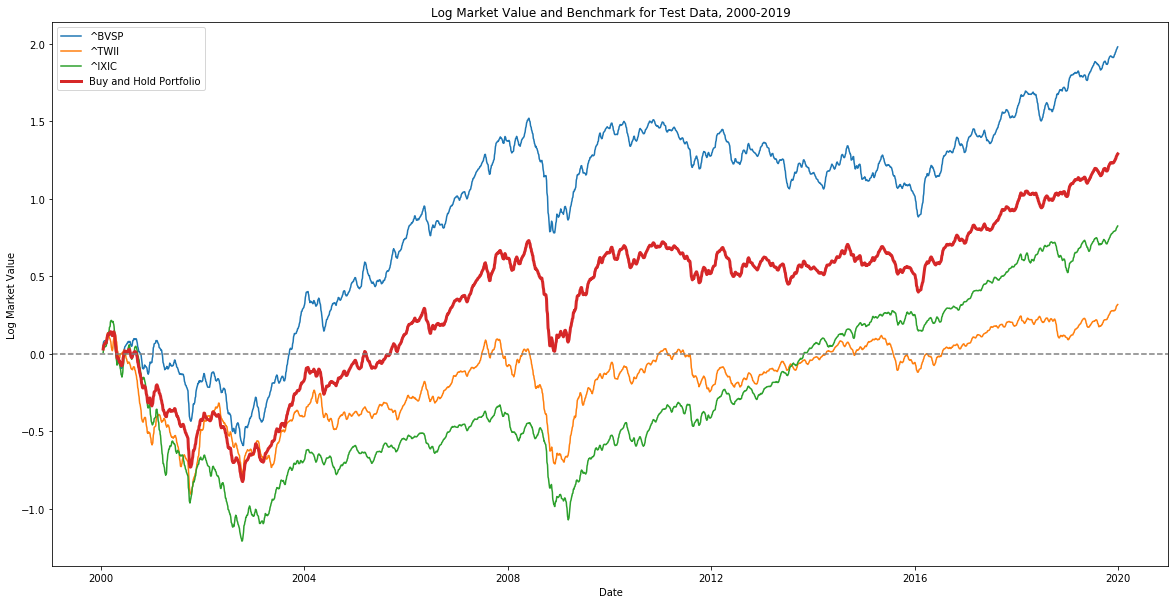

In [4]:
start_date = pd.to_datetime("2000-01-01")
end_date = pd.to_datetime("2019-12-31")

plot_benchmark(start_date, end_date, "Log Market Value and Benchmark for Test Data, 2000-2019")

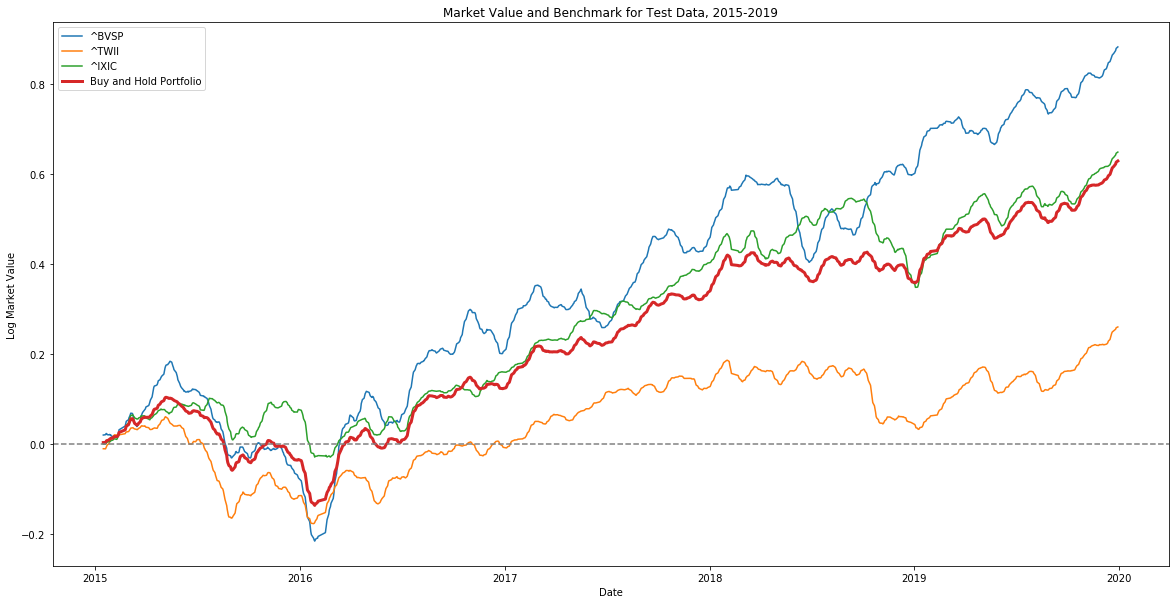

In [102]:
start_date = pd.to_datetime("2015-01-01")
end_date = pd.to_datetime("2019-12-31")

plot_benchmark(start_date, end_date, "Market Value and Benchmark for Test Data, 2015-2019")

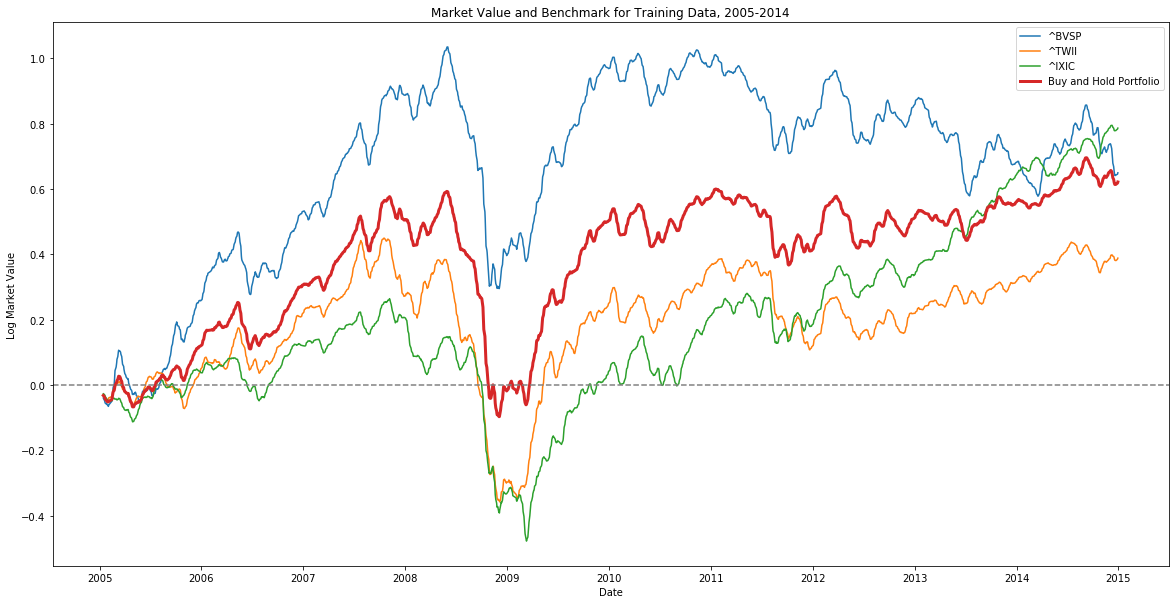

In [103]:
start_date = pd.to_datetime("2005-01-01")
end_date = pd.to_datetime("2014-12-31")

plot_benchmark(start_date, end_date, "Market Value and Benchmark for Training Data, 2005-2014")

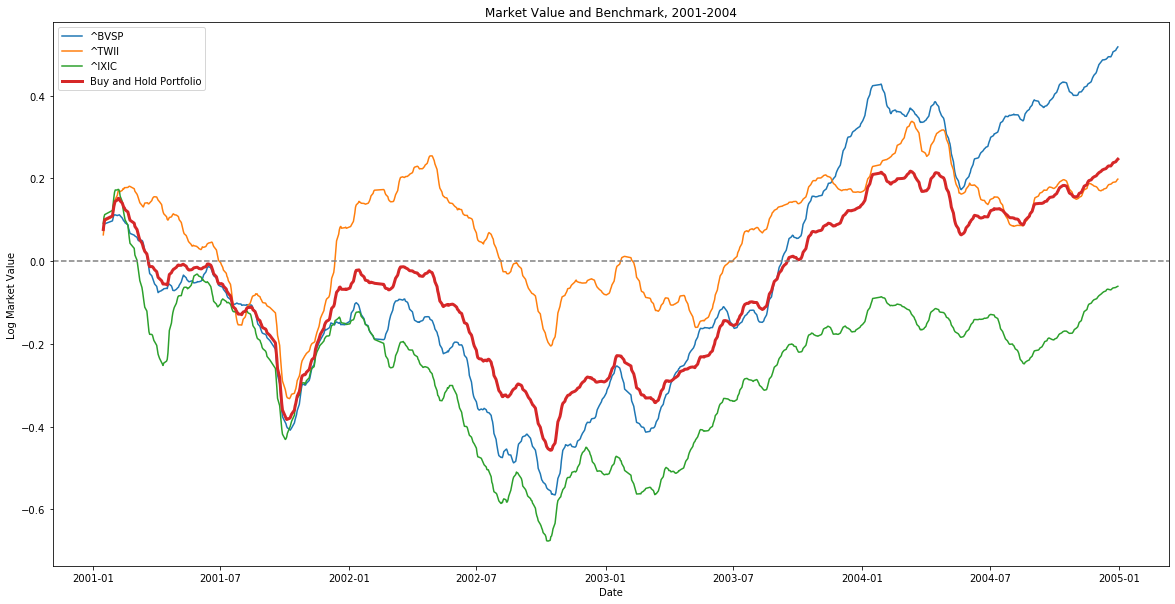

In [104]:
start_date = pd.to_datetime("2001-01-01")
end_date = pd.to_datetime("2004-12-31")

plot_benchmark(start_date, end_date, "Market Value and Benchmark, 2001-2004")

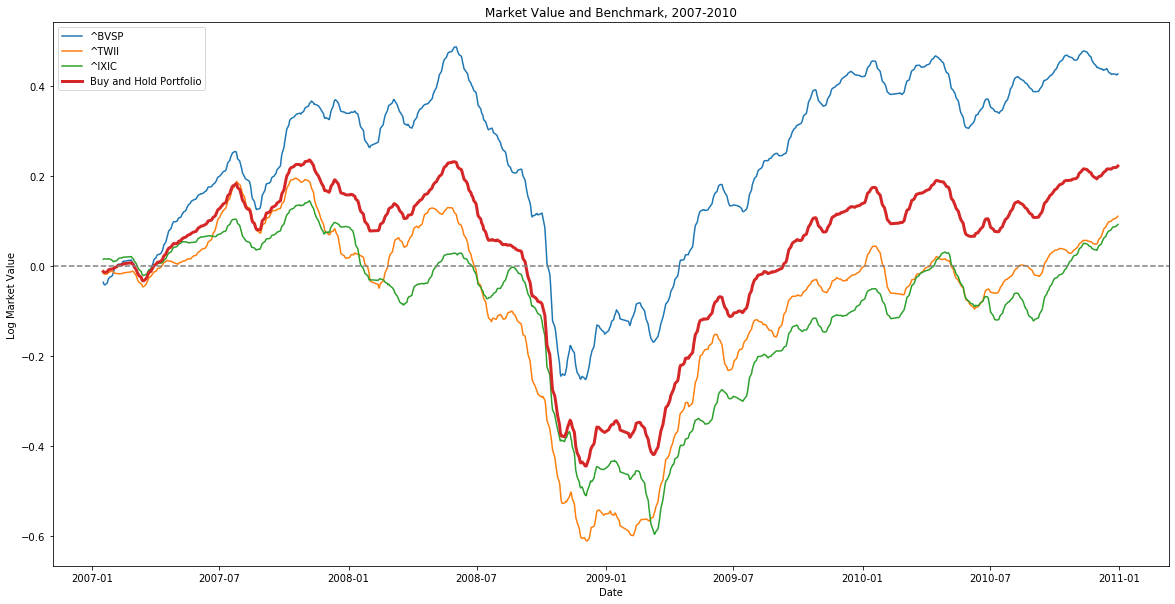

In [105]:
start_date = pd.to_datetime("2007-01-01")
end_date = pd.to_datetime("2010-12-31")

plot_benchmark(start_date, end_date, "Market Value and Benchmark, 2007-2010")

In [79]:
DIR ="./from github/Stock-Trading-Environment/data"
file_list = ["^BVSP", "^TWII", "^IXIC"]

start_date = pd.to_datetime("2015-01-01")
end_date = pd.to_datetime("2019-12-31")

df_list = []

for file_name in file_list:
    df = csv2df(DIR, file_name+"_new.csv", source="done")
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].reset_index(drop = True)
    df_list.append(df)

In [80]:
init_price = np.array([df['Price'][0] for df in df_list])
init_num = 100000/init_price
bnh_value = []
for i in range(len(df_list[0])):
    date = df_list[0]['Date'][i]
    if ((df_list[1]['Date'] == date).any()) and ((df_list[2]['Date'] == date).any()):
        price_arr = np.array([df[df['Date']==date]['Price'].values[0] for df in df_list])
        market_value = init_num*price_arr
        avg_value = np.mean(market_value)
        bnh_value.append({
            "Date": date,
            "Value": avg_value
        })

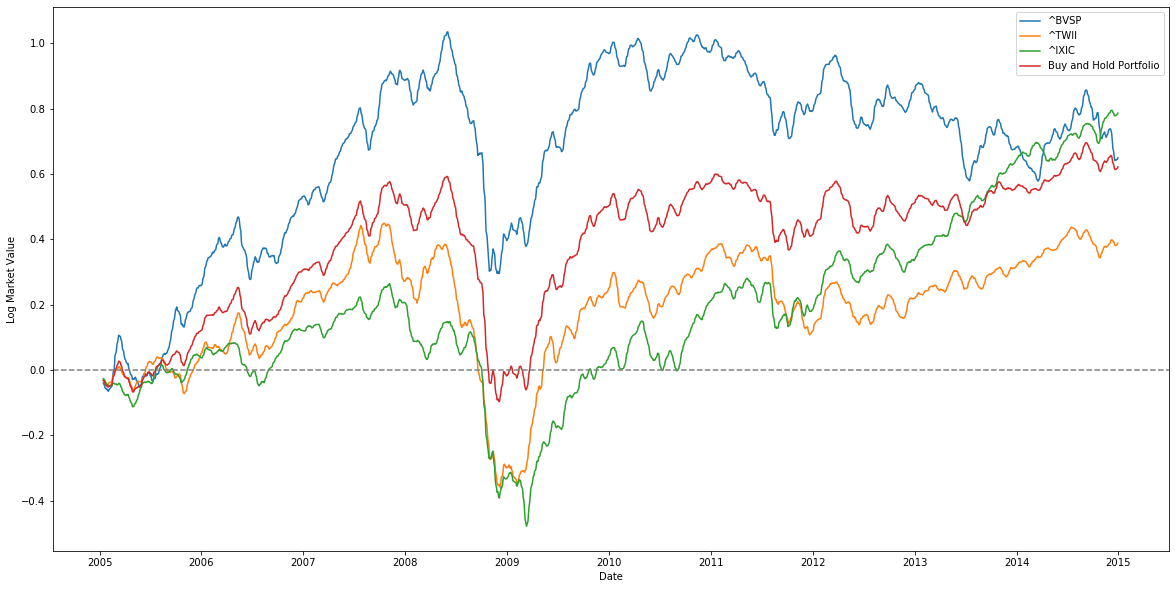

In [78]:
plt.figure(figsize = (20, 10))

for i, df in enumerate(df_list):
    y = np.log(df['Price']/df['Price'][0])
    moving_avg = pd.Series(y).rolling(window=10).mean().values   
    plt.plot(df['Date'], moving_avg, label = file_list[i])

    
bnh_df = pd.DataFrame(bnh_value)
y = np.log(bnh_df['Value']/100000)
moving_avg = pd.Series(y).rolling(window=10).mean().values

plt.plot(bnh_df['Date'], moving_avg, label = "Buy and Hold Portfolio")    
plt.axhline(y=0, color = "grey", linestyle='--')
plt.xlabel("Date")
plt.ylabel("Log Market Value")
plt.legend()
plt.show()